In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

C:\Users\dimac\AppData\Local\Temp\ipykernel_34096\1832006054.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


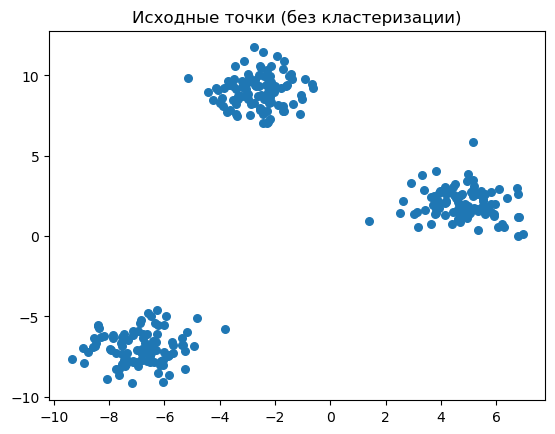

In [2]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Визуализируем данные
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title("Исходные точки (без кластеризации)")
plt.show()

In [3]:
# Определяем K-Means с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)

# Обучаем модель
kmeans.fit(X)

# Получаем предсказанные метки кластеров
labels = kmeans.labels_

# Получаем координаты центроидов
centroids = kmeans.cluster_centers_

c:\Users\dimac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


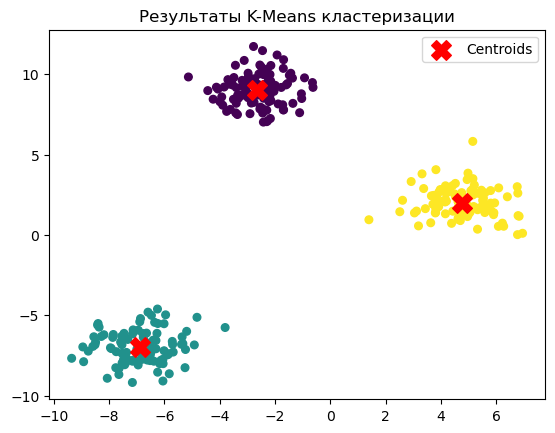

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Результаты K-Means кластеризации")
plt.legend()
plt.show()

In [5]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data", data_dir='./data')

df = pd.read_csv("data/unsupervised-learning-on-country-data/Country-data.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data


c:\Users\dimac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dimac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dimac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dimac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

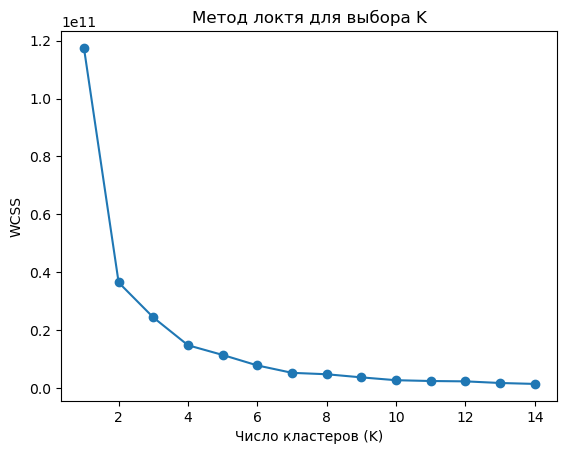

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Создадим вектор признаков
X = df.iloc[:, 1:]

# Считаем WCSS для разных K
wcss = []
K_values = range(1, 15)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ -- сумма квадратов расстояний точек до центроидов

# Строим график
plt.plot(K_values, wcss, marker='o', linestyle='-')
plt.xlabel("Число кластеров (K)")
plt.ylabel("WCSS")
plt.title("Метод локтя для выбора K")
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

k_values = [6, 7, 8]
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores[k] = score
    print(f"K = {k}, Silhouette Score: {score:.4f}")

c:\Users\dimac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K = 6, Silhouette Score: 0.5929


c:\Users\dimac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K = 7, Silhouette Score: 0.5950
K = 8, Silhouette Score: 0.5663


c:\Users\dimac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\dimac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dimac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dimac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


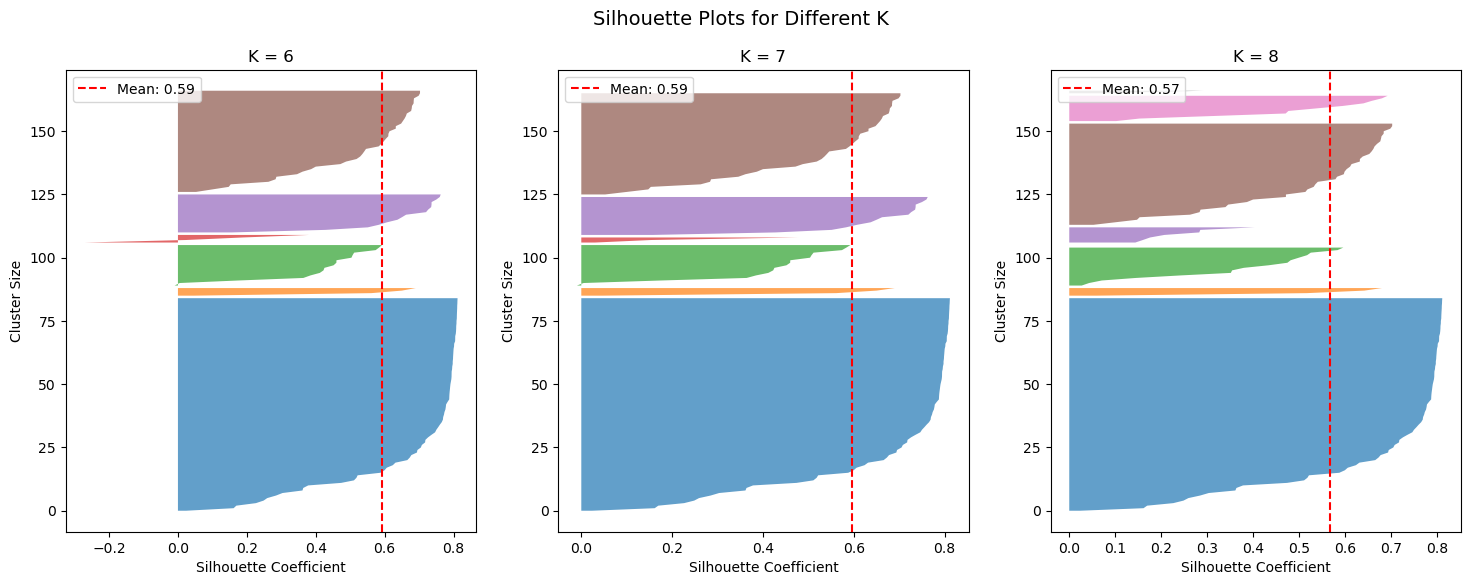

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Функция для построения силуэтных графиков
def plot_silhouette(X, cluster_counts):
    fig, axes = plt.subplots(1, len(cluster_counts), figsize=(18, 6))

    for idx, K in enumerate(cluster_counts):
        kmeans = KMeans(n_clusters=K, random_state=42)
        cluster_labels = kmeans.fit_predict(X)

        # Вычисляем силуэтные коэффициенты
        silhouette_vals = silhouette_samples(X, cluster_labels)

        y_lower, y_upper = 0, 0
        axes[idx].set_title(f"K = {K}")
        
        for i in range(K):
            cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
            cluster_silhouette_vals.sort()

            y_upper += len(cluster_silhouette_vals)
            axes[idx].fill_betweenx(
                np.arange(y_lower, y_upper), 
                0, 
                cluster_silhouette_vals, 
                alpha=0.7
            )
            y_lower = y_upper
        
        # Средний силуэтный коэффициент
        avg_score = silhouette_score(X, cluster_labels)
        axes[idx].axvline(avg_score, linestyle="--", color="red", label=f"Mean: {avg_score:.2f}")
        axes[idx].legend()
        axes[idx].set_xlabel("Silhouette Coefficient")
        axes[idx].set_ylabel("Cluster Size")
    
    plt.suptitle("Silhouette Plots for Different K", fontsize=14)
    plt.show()

# Вызываем функцию для K=6, 7, 8
plot_silhouette(X, cluster_counts=[6, 7, 8])